## Image Operations in Tensorflow

This notebook explores the tensorflow APIs for image processing, both in the main as well as the addons package.

#### Refs:
    
* https://www.tensorflow.org/api_docs/python/tf/image
* https://www.tensorflow.org/addons/api_docs/python/tfa/image

In [3]:
import PIL
from PIL import Image
import os
import numpy as np

#from tensorflow.keras.utils import np_utils
import tensorflow as tf
import tensorflow_addons as tfa

import matplotlib.pyplot as plt

In [4]:
image = Image.open('a.JPG')
image = np.asarray(image, dtype="float32")/255.0


Aux function: show trio of images

In [5]:
def show_trio(a,b,c):
    _, ax = plt.subplots(1,3, figsize=(9,3))
    ax[0].imshow(a)
    ax[1].imshow(b)
    ax[2].imshow(c)
    plt.show()
    


## Brightness

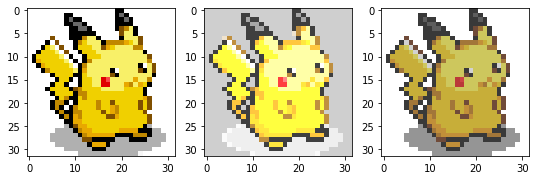

In [6]:
img1 = tf.clip_by_value(tf.image.adjust_brightness(image, delta=0.25), 0.0, 1.0)

# range [-max_delta, max_delta]
img2 = tf.clip_by_value(tf.image.random_brightness(image, max_delta = 0.25), 0, 1)

show_trio(image, img1, img2)

## Contrast

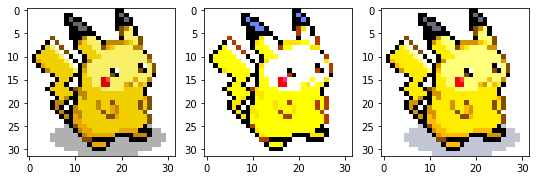

In [7]:
img1 = tf.clip_by_value(tf.image.adjust_contrast(image, contrast_factor = 3), 0.0, 1.0)

# lower and upper > 0
img2 = tf.clip_by_value(tf.image.random_contrast(image, lower=0.7, upper=2.0, seed=None), 0, 1)

show_trio(image, img1, img2)

## Hue

In [8]:
img1 = tf.image.adjust_hue(image, delta=-0.3)

# max_delta in [0, 0.5]
img2 = tf.image.random_hue(image, max_delta=0.20, seed=None)

show_trio(image, img1, img2)

InvalidArgumentError: input must have 3 channels but instead has 4 channels. [Op:AdjustHue]

## Saturation

In [ ]:
img1 = tf.image.adjust_saturation(image, saturation_factor=-0.3)


# lower > 0
img2 = tf.image.random_saturation(image, lower=0.6, upper= 1.4, seed=None)

show_trio(image, img1, img2)

## Crop

In [ ]:
shape = list(image.shape)
print(shape)
img1 = tf.image.random_crop(image, size = [int(shape[0] * 0.8), int(shape[1] * 0.8), 3])
img1 = tf.image.resize(img1 , size = shape[:2])

c = tf.random.uniform(shape=(), minval=shape[0] * 0.8, maxval=shape[0], dtype=tf.dtypes.float32)
img2 = tf.image.random_crop(image, size=[c,c,3])

show_trio(image, img1, img2)

## Flip

In [ ]:
img1 = tf.image.random_flip_left_right(image)

img2 = tf.image.random_flip_up_down(image)

show_trio(image, img1, img2)

# With tfa.image

Requires tensorflow 2.4 to work in some operations

## Rotate

In [ ]:
img1 = tfa.image.rotate(image, 0.707, fill_mode='nearest')
img2 = tfa.image.rotate(image, tf.random.uniform(shape=(), minval=-0.175, maxval=0.175))

show_trio(image, img1, img2)



## Translate

In [ ]:
tx = tf.random.uniform(shape=(), minval=-3, maxval=3, dtype=tf.dtypes.float32)
ty = tf.random.uniform(shape=(), minval=-3, maxval=3, dtype=tf.dtypes.float32)  

img1 = tfa.image.translate(image, [tx,ty])
   
img2 = tfa.image.translate(image, [10,-10])    
show_trio(image, img1, img2)


## Shear

In [ ]:
img1 = tfa.image.shear_x(image, 0.5, replace = [0,0,0])

sx = tf.random.uniform(shape=(), minval=-0.15, maxval=0.15, dtype=tf.dtypes.float32)
img2 = tfa.image.shear_x(image, sx, replace = [0,0,0])
sy = tf.random.uniform(shape=(), minval=-0.15, maxval=0.15, dtype=tf.dtypes.float32)
img2 = tfa.image.shear_y(img2, sy, replace = [0,0,0])   


show_trio(image, img1, img2)

## Transform

tfa.ima.transform(image, [a0, a1, a2, b0, b1, b2, c0, c1], fill_mode)

Considering a pixel $(x'', y'')$ this pixel will be remapped to location $(x, y) $ where the relation between these points is as below:

$ \begin{bmatrix}
x' \\
y' \\
z'
\end{bmatrix} =  \begin{bmatrix}
a_0 & a_1 & a_2\\
b_0 & b_1 & b_2\\
c_0 & c_1 & 1
\end{bmatrix}  \begin{bmatrix}
x \\
y \\
1
\end{bmatrix}$

and 

$(x'', y'') = (\Large \frac{x'}{z'}, \frac{y'}{z'}) $



documentation [link](https://www.tensorflow.org/addons/api_docs/python/tfa/image/transform)



centre shear_x($k$) = transform($1, k, -k*w*0.5, 0, 1, 0, 0, 0$)

In [ ]:
print(image.shape)

angle = 30
m = tf.tan(angle*3.14159/180)
img1 = tfa.image.transform(image, [1, m, -image.shape[0]*m * 0.5,   0,1,0,  0,0], fill_mode='nearest')

i = 0.57735 # this is already the tangent
img2 = tfa.image.transform(image, [1, i, -image.shape[0]*i*0.5,    0 ,1, 0,   0,0], fill_mode='nearest')

show_trio(image, img1, img2)

In [ ]:
img1 = tf.keras.preprocessing.image.random_shear(image, 45,row_axis=0, col_axis=1, channel_axis=2)

img2 = tfa.image.rotate(image, tf.random.uniform(shape=(), minval=-0.175, maxval=0.175), fill_mode='nearest')
img2 = tf.keras.preprocessing.image.random_shear(img2.numpy(), 5 ,row_axis=0, col_axis=1, channel_axis=2)

show_trio(image, img1, img2)

In [ ]:
img1 = tfa.image.rotate(image, tf.random.uniform(shape=(), minval=-0.175, maxval=0.175), fill_mode='nearest')

img2 = tf.keras.preprocessing.image.random_shear(img1.numpy(), 15 ,row_axis=0, col_axis=1, channel_axis=2)

show_trio(image, img1, img2)

In [ ]:
angle = tf.random.uniform(shape=(), minval=-2.0, maxval=2.0)
print(angle)